### Poisson Ratings
https://penaltyblog.readthedocs.io/en/latest/ratings/massey_ratings.html

https://www.pro-football-reference.com/years/2022/games.htm


In [105]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [106]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import penaltyblog as pb

In [107]:
try:
    import nfl_data_py as nfl
except:
    ! pip install nfl_data_py

In [203]:
semana = 7
temporada = 2022
MAX = 50
normalizacion = 0
df = nfl.import_schedules([temporada])
df = df[df['week']<semana]

In [204]:
df = df.rename(columns={'away_team':'AwayTeam',
                                   'home_team':'HomeTeam',
                       'away_score':'FTHG',
                       'home_score':'FTAG'})


In [205]:
df[['FTHG','FTAG']]

,FTHG,FTAG
6137,31.0,10.0
6138,27.0,26.0
6139,26.0,24.0
6140,10.0,19.0
6141,23.0,20.0
...,...,...
6226,10.0,24.0
6227,9.0,19.0
6228,24.0,20.0
6229,17.0,26.0


In [206]:
df[df['AwayTeam']=='BUF']

,game_id,season,game_type,week,gameday,weekday,gametime,AwayTeam,FTHG,HomeTeam,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6137,2022_01_BUF_LA,2022,REG,1,2022-09-08,Thursday,20:20,BUF,31.0,LA,...,NaN,00-0034857,00-0026498,Josh Allen,Matthew Stafford,Sean McDermott,Sean McVay,Carl Cheffers,LAX01,SoFi Stadium
6173,2022_03_BUF_MIA,2022,REG,3,2022-09-25,Sunday,13:00,BUF,19.0,MIA,...,NaN,00-0034857,00-0036212,Josh Allen,Tua Tagovailoa,Sean McDermott,Mike McDaniel,Alex Kemp,MIA00,Hard Rock Stadium
6188,2022_04_BUF_BAL,2022,REG,4,2022-10-02,Sunday,13:00,BUF,23.0,BAL,...,NaN,00-0034857,00-0034796,Josh Allen,Lamar Jackson,Sean McDermott,John Harbaugh,Jerome Boger,BAL00,M&T Bank Stadium
6228,2022_06_BUF_KC,2022,REG,6,2022-10-16,Sunday,16:25,BUF,24.0,KC,...,NaN,00-0034857,00-0033873,Josh Allen,Patrick Mahomes,Sean McDermott,Andy Reid,Brad Allen,KAN00,GEHA Field at Arrowhead Stadium


In [207]:
df['FTHG'].max()

48.0

In [208]:
df['FTAG'].max()

45.0

In [209]:
if normalizacion == 1:
    df['FTHG'] = (df['FTHG'] - df['FTHG'].min()) / ( df['FTHG'].max() - df['FTHG'].min()) * MAX
    df['FTAG'] = (df['FTAG'] - df['FTAG'].min()) / ( df['FTAG'].max() - df['FTAG'].min()) * MAX
#elif normalizacion == 2:
#    df['FTHG'] = (df['FTHG']-df['FTHG'].mean())/df['FTHG'].std()
#    df['FTAG'] = (df['FTAG']-df['FTAG'].mean())/df['FTAG'].std()

In [210]:
df['FTHG'].max()


48.0

In [211]:
df['FTAG'].max()

45.0

In [212]:
df[["FTHG", "FTAG"]].mean()

FTHG    21.085106
FTAG    22.180851
dtype: float64

In [213]:
df[['FTHG','FTAG']]

,FTHG,FTAG
6137,31.0,10.0
6138,27.0,26.0
6139,26.0,24.0
6140,10.0,19.0
6141,23.0,20.0
...,...,...
6226,10.0,24.0
6227,9.0,19.0
6228,24.0,20.0
6229,17.0,26.0


Text(0.5, 1.0, 'Number of Points Scored Per Match')

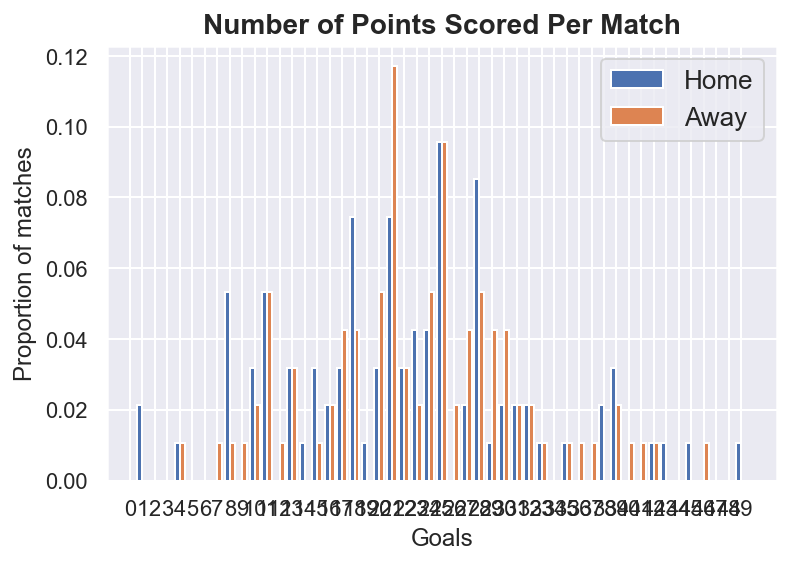

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

max_goals = MAX
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
                 label=["Home", "Away"], density=True
)
plt.xticks([i - 0.5 for i in range(max_goals)], 
            [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Points Scored Per Match", size=14, 
          fontweight="bold")

Text(0.5, 1.0, 'Number of Points Scored Per Match')

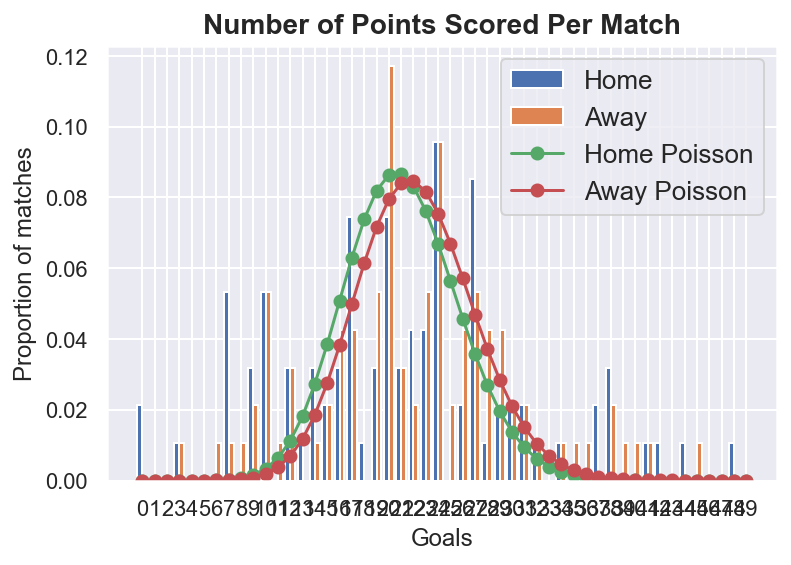

In [215]:
import numpy as np
from scipy.stats import poisson

home_poisson = poisson.pmf(range(MAX), df["FTHG"].mean())
away_poisson = poisson.pmf(range(MAX), df["FTAG"].mean())

max_goals = MAX
plt.hist(
    df[["FTHG", "FTAG"]].values, range(max_goals), 
               label=["Home", "Away"], density=True
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    home_poisson,
    linestyle="-",
    marker="o",
    label="Home Poisson",
)

plt.plot(
    [i - 0.5 for i in range(1, max_goals + 1)],
    away_poisson,
    linestyle="-",
    marker="o",
    label="Away Poisson",
)


plt.xticks([i - 0.5 for i in range(1, max_goals + 1)], 
           [i for i in range(max_goals)])
plt.xlabel("Goals")
plt.ylabel("Proportion of matches")
plt.legend(loc="upper right", fontsize=13)
plt.title("Number of Points Scored Per Match", size=14, fontweight="bold")

In [216]:
def log_likelihood(
    goals_home_observed,
    goals_away_observed,
    home_attack,
    home_defence,
    away_attack,
    away_defence,
    home_advantage,
):
    goal_expectation_home = np.exp(home_attack + 
                                   away_defence + home_advantage)
    goal_expectation_away = np.exp(away_attack + home_defence)

    if goal_expectation_home < 0 or goal_expectation_away < 0:
        return 10000    

    home_llk = poisson.pmf(goals_home_observed, goal_expectation_home)
    away_llk = poisson.pmf(goals_away_observed, goal_expectation_away)

    log_llk = np.log(home_llk) + np.log(away_llk)

    return -log_llk

In [217]:
from scipy.optimize import minimize


def fit_poisson_model():
    teams = np.sort(np.unique(np.concatenate([df["HomeTeam"], 
                                              df["AwayTeam"]])))
    n_teams = len(teams)

    params = np.concatenate(
        (
            np.random.uniform(0.5, 1.5, (n_teams)),  # attack strength
            np.random.uniform(0, -1, (n_teams)),  # defence strength
            [0.25],  # home advantage
        )
    )

    def _fit(params, df, teams):
        attack_params = dict(zip(teams, params[:n_teams]))
        defence_params = dict(zip(teams, params[n_teams : 
                                                (2 * n_teams)]))
        home_advantage = params[-1]

        llk = list()
        for idx, row in df.iterrows():
            tmp = log_likelihood(
                row["FTHG"],
                row["FTAG"],
                attack_params[row["HomeTeam"]],
                defence_params[row["HomeTeam"]],
                attack_params[row["AwayTeam"]],
                defence_params[row["AwayTeam"]],
                home_advantage,
            )
            llk.append(tmp)

        return np.sum(llk)

    options = {
        "maxiter": 100,
        "disp": False,
    }

    constraints = [{"type": "eq", "fun": lambda x: 
                    sum(x[:n_teams]) - n_teams}]

    res = minimize(
        _fit,
        params,
        args=(df, teams),
        constraints=constraints,
        options=options,
    )

    model_params = dict(
        zip(
            ["attack_" + team for team in teams]
            + ["defence_" + team for team in teams]
            + ["home_adv"],
            res["x"],
        )
    )

    return model_params

model_params = fit_poisson_model()

In [218]:
from pprint import pprint

pprint(model_params)

{'attack_ARI': 1.0415084705400655,
 'attack_ATL': 1.0959697832338071,
 'attack_BAL': 1.0231199484454383,
 'attack_BUF': 0.35022768912756447,
 'attack_CAR': 1.2106741297845802,
 'attack_CHI': 1.0494951399039858,
 'attack_CIN': 0.7454727931794028,
 'attack_CLE': 1.334360519014804,
 'attack_DAL': 0.7925408567758367,
 'attack_DEN': 0.8027855353304466,
 'attack_DET': 1.5252123847158525,
 'attack_GB': 1.083210304175178,
 'attack_HOU': 1.0551982242049558,
 'attack_IND': 0.9056991160495154,
 'attack_JAX': 0.9819379578827578,
 'attack_KC': 1.19645144229801,
 'attack_LA': 1.0687918017346114,
 'attack_LAC': 1.1048176541053814,
 'attack_LV': 1.1828095671873955,
 'attack_MIA': 1.0762883273407942,
 'attack_MIN': 0.8053105302144252,
 'attack_NE': 0.6885217951606475,
 'attack_NO': 1.3078647864028674,
 'attack_NYG': 0.9083128855885232,
 'attack_NYJ': 0.877828278664488,
 'attack_PHI': 0.8160543368940505,
 'attack_PIT': 1.0868394782020048,
 'attack_SEA': 1.2626006734544506,
 'attack_SF': 0.79485649398766

In [219]:
def predict(home_team, away_team, params, max_goals=MAX):
    home_attack = params["attack_" + home_team]
    home_defence = params["defence_" + home_team]
    away_attack = params["attack_" + away_team]
    away_defence = params["defence_" + away_team]
    home_advantage = params["home_adv"]

    home_goal_expectation = np.exp(home_attack + away_defence
                                   +home_advantage)
    away_goal_expectation = np.exp(away_attack + home_defence)

    home_probs = poisson.pmf(list(range(max_goals + 1)), 
                             home_goal_expectation)
    away_probs = poisson.pmf(range(max_goals + 1), 
                             away_goal_expectation)

    probability_matrix = np.outer(home_probs, away_probs)

    return probability_matrix

In [220]:
pr = nfl.import_schedules([temporada])
pr = pr[pr['week']==semana ]
juegos = pr['week'].count()

In [221]:
pr = pr.rename(columns={'away_team':'AwayTeam',
                                   'home_team':'HomeTeam',
                       'away_score':'FTHG',
                       'home_score':'FTAG'})

In [222]:
for i in range(0,juegos):
    EL = pr.iloc[i]['HomeTeam']
    EV = pr.iloc[i]['AwayTeam']
    
    probs = predict(EL, EV, model_params, MAX)
    #pprint(probs)
    L = np.sum(np.tril(probs, -1)) 
    V = np.sum(np.triu(probs, 1)) 
    E = np.sum(np.diag(probs)) 
    M = MAX
    fl = '{0:.2g}'.format(L*M)
    fv = '{0:.2g}'.format(V*M)
    fe = '{0:.2g}'.format(E*M)
    print(f'\nVisita {fv} Local {fl} ')
    if L > V :
        print(f'{EV} {fv} @  {EL} {fl} --- Favorito Local {EL}')
    else:
        print(f'{EV} {fv} @  {EL} {fl} --- Favorito Visita {EV}')


Visita 27 Local 20 
NO 27 @  ARI 20 --- Favorito Visita NO

Visita 34 Local 0.059 
CLE 34 @  BAL 0.059 --- Favorito Visita CLE

Visita 2.4 Local 47 
TB 2.4 @  CAR 47 --- Favorito Local CAR

Visita 47 Local 2.4 
ATL 47 @  CIN 2.4 --- Favorito Visita ATL

Visita 47 Local 1.3 
DET 47 @  DAL 1.3 --- Favorito Visita DET

Visita 38 Local 9.7 
NYG 38 @  JAX 9.7 --- Favorito Visita NYG

Visita 32 Local 15 
IND 32 @  TEN 15 --- Favorito Visita IND

Visita 21 Local 26 
GB 21 @  WAS 26 --- Favorito Local WAS

Visita 11 Local 37 
NYJ 11 @  DEN 37 --- Favorito Local DEN

Visita 40 Local 7.8 
HOU 40 @  LV 7.8 --- Favorito Visita HOU

Visita 40 Local 8.1 
SEA 40 @  LAC 8.1 --- Favorito Visita SEA

Visita 22 Local 25 
KC 22 @  SF 25 --- Favorito Local SF

Visita 47 Local 1.8 
PIT 47 @  MIA 1.8 --- Favorito Visita PIT

Visita 48 Local 1.5 
CHI 48 @  NE 1.5 --- Favorito Visita CHI


# Históricos

# Históricos

# Históricos

In [14]:
data_file = './data/spreadspoke_scores.csv'
dfh = pd.read_csv(data_file, index_col=0)
dfh.iloc[0:16]

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
schedule_date,,,,,,,,,,,,,,,,
9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
9/10/1966,1966,2,False,Houston Oilers,31.0,0.0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN
9/10/1966,1966,2,False,San Diego Chargers,24.0,0.0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN
9/11/1966,1966,1,False,Atlanta Falcons,14.0,19.0,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN
9/11/1966,1966,2,False,Buffalo Bills,20.0,42.0,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN


In [15]:
dfh[dfh['team_home']=='Washington Redskins']
dfh['nuevo'] = np.where(dfh['team_home']=='Washington Redskins',1,0)
dfh[dfh['team_home']=='Washington Redskins']



,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,nuevo
schedule_date,,,,,,,,,,,,,,,,,
9/11/1966,1966,1,False,Washington Redskins,14.0,38.0,Cleveland Browns,NaN,NaN,NaN,RFK Memorial Stadium,False,65.0,8.0,52.0,NaN,1
10/2/1966,1966,4,False,Washington Redskins,24.0,10.0,Pittsburgh Steelers,NaN,NaN,NaN,RFK Memorial Stadium,False,48.0,5.0,74.0,NaN,1
10/9/1966,1966,5,False,Washington Redskins,33.0,20.0,Atlanta Falcons,NaN,NaN,NaN,RFK Memorial Stadium,False,59.0,4.0,77.0,NaN,1
10/23/1966,1966,7,False,Washington Redskins,26.0,20.0,St. Louis Cardinals,NaN,NaN,NaN,RFK Memorial Stadium,False,58.0,6.0,83.0,NaN,1
11/13/1966,1966,10,False,Washington Redskins,30.0,31.0,Dallas Cowboys,NaN,NaN,NaN,RFK Memorial Stadium,False,40.0,8.0,71.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/20/2019,2019,7,False,Washington Redskins,0.0,9.0,San Francisco 49ers,SF,-10.0,39,FedEx Field,False,NaN,NaN,NaN,NaN,1
11/17/2019,2019,11,False,Washington Redskins,17.0,34.0,New York Jets,WAS,-2.0,37.5,FedEx Field,False,NaN,NaN,NaN,NaN,1
11/24/2019,2019,12,False,Washington Redskins,19.0,16.0,Detroit Lions,DET,-4.0,40,FedEx Field,False,NaN,NaN,NaN,NaN,1


In [16]:
df_equipos = nfl.import_team_desc()
df_equipos = df_equipos[['team_name','team_abbr']]
#df_equipos

In [17]:
df_equipos = df_equipos.rename(columns={'team_name':'team_home'})
df_equipos

,team_home,team_abbr
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Ravens,BAL
3,Buffalo Bills,BUF
4,Carolina Panthers,CAR
5,Chicago Bears,CHI
6,Cincinnati Bengals,CIN
7,Cleveland Browns,CLE
8,Dallas Cowboys,DAL
9,Denver Broncos,DEN


In [18]:
dfh = dfh.merge(df_equipos, how='inner', on='team_home')
dfh

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,nuevo,team_abbr
0,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,0,MIA
1,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,0,MIA
2,1966,7,False,Miami Dolphins,24.0,7.0,Denver Broncos,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
3,1966,10,False,Miami Dolphins,0.0,29.0,Buffalo Bills,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
4,1966,13,False,Miami Dolphins,14.0,20.0,New England Patriots,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,2022,9,False,Washington Commanders,NaN,NaN,Minnesota Vikings,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12607,2022,12,False,Washington Commanders,NaN,NaN,Atlanta Falcons,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12608,2022,15,False,Washington Commanders,NaN,NaN,New York Giants,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12609,2022,17,False,Washington Commanders,NaN,NaN,Cleveland Browns,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS


In [19]:
dfh = dfh.rename(columns={'team_abbr':'home_team'})
dfh

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,nuevo,home_team
0,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,0,MIA
1,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,0,MIA
2,1966,7,False,Miami Dolphins,24.0,7.0,Denver Broncos,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
3,1966,10,False,Miami Dolphins,0.0,29.0,Buffalo Bills,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
4,1966,13,False,Miami Dolphins,14.0,20.0,New England Patriots,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,2022,9,False,Washington Commanders,NaN,NaN,Minnesota Vikings,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12607,2022,12,False,Washington Commanders,NaN,NaN,Atlanta Falcons,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12608,2022,15,False,Washington Commanders,NaN,NaN,New York Giants,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS
12609,2022,17,False,Washington Commanders,NaN,NaN,Cleveland Browns,NaN,NaN,NaN,FedEx Field,False,NaN,NaN,NaN,NaN,0,WAS


In [20]:
df_equipos = df_equipos.rename(columns={'team_home':'team_away'})
df_equipos

,team_away,team_abbr
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Ravens,BAL
3,Buffalo Bills,BUF
4,Carolina Panthers,CAR
5,Chicago Bears,CHI
6,Cincinnati Bengals,CIN
7,Cleveland Browns,CLE
8,Dallas Cowboys,DAL
9,Denver Broncos,DEN


In [21]:
dfh = dfh.merge(df_equipos, how='inner', on='team_away')
dfh

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,nuevo,home_team,team_abbr
0,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,0,MIA,OAK
1,1968,3,False,Miami Dolphins,21.0,47.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA,OAK
2,1969,4,False,Miami Dolphins,20.0,20.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA,OAK
3,1970,3,False,Miami Dolphins,20.0,13.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,82.0,7.0,79.0,NaN,0,MIA,OAK
4,1973,Conference,True,Miami Dolphins,27.0,10.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,74.0,8.0,74.0,NaN,0,MIA,OAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,2022,10,False,Philadelphia Eagles,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Lincoln Financial Field,False,NaN,NaN,NaN,NaN,0,PHI,WAS
11785,2022,13,False,New York Giants,NaN,NaN,Washington Commanders,NaN,NaN,NaN,MetLife Stadium,False,NaN,NaN,NaN,NaN,0,NYG,WAS
11786,2022,6,False,Chicago Bears,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Soldier Field,False,NaN,NaN,NaN,NaN,0,CHI,WAS
11787,2022,8,False,Indianapolis Colts,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Lucas Oil Stadium,False,72.0,0.0,NaN,DOME,0,IND,WAS


In [22]:
dfh = dfh.rename(columns={'team_abbr':'away_team'})
dfh

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,nuevo,home_team,away_team
0,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,0,MIA,OAK
1,1968,3,False,Miami Dolphins,21.0,47.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA,OAK
2,1969,4,False,Miami Dolphins,20.0,20.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,NaN,NaN,NaN,NaN,0,MIA,OAK
3,1970,3,False,Miami Dolphins,20.0,13.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,82.0,7.0,79.0,NaN,0,MIA,OAK
4,1973,Conference,True,Miami Dolphins,27.0,10.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,74.0,8.0,74.0,NaN,0,MIA,OAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,2022,10,False,Philadelphia Eagles,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Lincoln Financial Field,False,NaN,NaN,NaN,NaN,0,PHI,WAS
11785,2022,13,False,New York Giants,NaN,NaN,Washington Commanders,NaN,NaN,NaN,MetLife Stadium,False,NaN,NaN,NaN,NaN,0,NYG,WAS
11786,2022,6,False,Chicago Bears,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Soldier Field,False,NaN,NaN,NaN,NaN,0,CHI,WAS
11787,2022,8,False,Indianapolis Colts,NaN,NaN,Washington Commanders,NaN,NaN,NaN,Lucas Oil Stadium,False,72.0,0.0,NaN,DOME,0,IND,WAS


In [23]:
def prob(l,v,d):
    if (l+v)>0 :
        return d/(l+v)
    else:
        return 0

In [24]:
prob(3,5,2)

0.25

In [25]:
for i in range(0,14):
    E2 = pr.iloc[i]['HomeTeam']
    E1 = pr.iloc[i]['AwayTeam']
    print (f'---------------------------------------')
    print(f'{i} {E1} @ {E2}')
    print (f'---------------------------------------')
    df2 = dfh.loc[(dfh['home_team'] == E1) & (dfh['away_team'] == E2)]
    #df2
    df2['ganador'] = np.where(df2['score_home']>df2['score_away'], 'L','V')
    df2['diferencial'] = df2['score_home'] - df2['score_away']
    #df2
    l = sum(df2.ganador == 'L')
    v = sum(df2.ganador == 'V')
    print (f'{E2} - local: {l} \n{E1} - visita: {v}')
    gamesundersix = sum(abs(df2.diferencial) <=6)
    print(f'juegos con diferencia {gamesundersix}')
    print(f'probabilidad de juego under six {prob(l,v,gamesundersix)*100}')
    print (f'---------------------------------------')
    df3 = dfh.loc[(dfh['away_team'] == E1) & (dfh['home_team'] == E2)]
    #df3
    df3['ganador'] = np.where(df3['score_home']>df3['score_away'], 'L','V')
    df3['diferencial'] = df3['score_home'] - df3['score_away']
    #df3
    l = sum(df3.ganador == 'L')
    v = sum(df3.ganador == 'V')
    print (f'{E1} - local: {l} \n{E2} - visita: {v}')
    gamesundersix = sum(abs(df3.diferencial) <=6)
    print(f'juegos con diferencia {gamesundersix}')
    print(f'probabilidad de juego under six {prob(l,v,gamesundersix)*100}')



---------------------------------------
0 NO @ ARI
---------------------------------------
ARI - local: 5 
NO - visita: 1
juegos con diferencia 0
probabilidad de juego under six 0.0
---------------------------------------
NO - local: 4 
ARI - visita: 3
juegos con diferencia 1
probabilidad de juego under six 14.285714285714285
---------------------------------------
1 CLE @ BAL
---------------------------------------
BAL - local: 7 
CLE - visita: 17
juegos con diferencia 10
probabilidad de juego under six 41.66666666666667
---------------------------------------
CLE - local: 18 
BAL - visita: 6
juegos con diferencia 6
probabilidad de juego under six 25.0
---------------------------------------
2 TB @ CAR
---------------------------------------
CAR - local: 9 
TB - visita: 13
juegos con diferencia 6
probabilidad de juego under six 27.27272727272727
---------------------------------------
TB - local: 12 
CAR - visita: 11
juegos con diferencia 7
probabilidad de juego under six 30.434782608